In [1]:

from sklearn.datasets import load_breast_cancer
import time
from tqdm import tqdm
import sys
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.svm import SVC



# cargar y escalar los datos

In [2]:
data = load_breast_cancer()
print(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [3]:
import pandas as pd
X = data.data
print(X)
print(X.shape)#cojo solo las predictoras

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)


In [4]:
y = data.target
print(y)
print(y.shape)#cojo solo la clase

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [5]:
print("x antes:")
print(X)

x antes:
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [6]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X=st.fit_transform(X)

In [7]:
print("x despues:")
print(X)

x despues:
[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


<h1>Defino el algoritmo</h1>

In [8]:
from sklearn.model_selection import StratifiedKFold
K=10
skf=StratifiedKFold(n_splits=K)#preparo validacion cruzada

In [9]:
#hallar el numero de means optimo
#para k en el numero de means que quieras
    #para la separacion de la validacion cruzada
        #aplico kmeans
        #guardo etiquetas
        #array
        #para i menor que k 
            #aplico la moda
        #sumo puntuaciones
    #guardo porcentajes





#para cada numero de centros, que aciertos en entrena y test hay
#para cada numero de centros haces validacion cruzada

inicial=time.time()#tiempo inicial
r_centros=pd.DataFrame(columns=["No. Centros","Aciertos Entrena","Aciertos Verifica"])
for a,k in tqdm(enumerate(range(2,31,1)),total=29,unit="n_clusters"):
    

   
    aciertos_entrena=0.0
    aciertos_verifica=0.0

    for train_index,test_index in skf.split(X,y):
        

        kmedias=KMeans(n_clusters=k)
        X_train=X[train_index]
        y_train=y[train_index]
        X_test=X[test_index]
        y_test=y[test_index]
        kmedias.fit(X_train)#entreno

       


        #LL
        label_training=kmedias.labels_

        label_cluster=np.zeros((k,), dtype=int)-1
        
       

        for i in range(k):
            
           
            label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)#los buscas en y_train
           
            

        #prediciones dentro de array y acuracy sobre ella
        aciertos_entrena+=accuracy_score(label_cluster[label_training],y_train)
        aciertos_verifica+=accuracy_score(label_cluster[kmedias.predict(X_test)],y_test)#array con prediccion 
        print("aciertos entrena:",aciertos_entrena)
        print("aciertos verifica:",aciertos_verifica)

        

    r_centros.loc[a]=[k,aciertos_entrena/K,aciertos_verifica/K]
   

elapsed_time=time.time()-inicial#fin del tiempo
print("Tiempo=",elapsed_time,"sec.")


  0%|          | 0/29 [00:00<?, ?n_clusters/s]c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: Fu

aciertos entrena: 0.91796875
aciertos verifica: 0.9298245614035088
aciertos entrena: 1.845703125
aciertos verifica: 1.7719298245614035
aciertos entrena: 2.7578125
aciertos verifica: 2.6842105263157894
aciertos entrena: 3.673828125
aciertos verifica: 3.5964912280701755
aciertos entrena: 4.59375
aciertos verifica: 4.508771929824562
aciertos entrena: 5.4921875
aciertos verifica: 5.4561403508771935


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 6.40234375
aciertos verifica: 6.333333333333334
aciertos entrena: 7.30078125
aciertos verifica: 7.298245614035088
aciertos entrena: 8.208984375
aciertos verifica: 8.210526315789474
aciertos entrena: 9.11151848806043
aciertos verifica: 9.139097744360903
aciertos entrena: 0.86328125
aciertos verifica: 0.8771929824561403
aciertos entrena: 1.736328125
aciertos verifica: 1.719298245614035


c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` wil

aciertos entrena: 2.60546875
aciertos verifica: 2.6140350877192984
aciertos entrena: 3.482421875
aciertos verifica: 3.43859649122807
aciertos entrena: 4.35546875
aciertos verifica: 4.298245614035087
aciertos entrena: 5.220703125
aciertos verifica: 5.2105263157894735
aciertos entrena: 6.09375
aciertos verifica: 6.052631578947368
aciertos entrena: 6.95703125
aciertos verifica: 6.982456140350877


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 7.830078125
aciertos verifica: 7.842105263157894
aciertos entrena: 8.697524518762183
aciertos verifica: 8.717105263157894
aciertos entrena: 0.91015625
aciertos verifica: 0.8421052631578947
aciertos entrena: 1.8125
aciertos verifica: 1.6842105263157894
aciertos entrena: 2.70703125
aciertos verifica: 2.56140350877193


c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` wil

aciertos entrena: 3.59765625
aciertos verifica: 3.456140350877193
aciertos entrena: 4.490234375
aciertos verifica: 4.368421052631579
aciertos entrena: 5.400390625
aciertos verifica: 5.315789473684211
aciertos entrena: 6.29296875
aciertos verifica: 6.192982456140351
aciertos entrena: 7.185546875
aciertos verifica: 7.12280701754386


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 8.064453125
aciertos verifica: 8.017543859649123
aciertos entrena: 8.959189967105264
aciertos verifica: 8.92825814536341
aciertos entrena: 0.921875
aciertos verifica: 0.9473684210526315
aciertos entrena: 1.845703125
aciertos verifica: 1.807017543859649
aciertos entrena: 2.75
aciertos verifica: 2.6842105263157894


c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` wil

aciertos entrena: 3.671875
aciertos verifica: 3.5964912280701755
aciertos entrena: 4.583984375
aciertos verifica: 4.491228070175438
aciertos entrena: 5.5
aciertos verifica: 5.456140350877193
aciertos entrena: 6.41796875
aciertos verifica: 6.368421052631579
aciertos entrena: 7.333984375
aciertos verifica: 7.333333333333333


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 8.24609375
aciertos verifica: 8.24561403508772
aciertos entrena: 9.170070358187134
aciertos verifica: 9.19204260651629
aciertos entrena: 0.94921875
aciertos verifica: 0.9473684210526315
aciertos entrena: 1.880859375
aciertos verifica: 1.8771929824561404


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 2.8203125
aciertos verifica: 2.7719298245614037
aciertos entrena: 3.763671875
aciertos verifica: 3.7017543859649127
aciertos entrena: 4.693359375
aciertos verifica: 4.666666666666667
aciertos entrena: 5.6328125
aciertos verifica: 5.631578947368421
aciertos entrena: 6.578125
aciertos verifica: 6.543859649122807


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 7.515625
aciertos verifica: 7.508771929824562
aciertos entrena: 8.439453125
aciertos verifica: 8.456140350877194
aciertos entrena: 9.379024275097466
aciertos verifica: 9.384711779448622
aciertos entrena: 0.9453125
aciertos verifica: 0.9473684210526315
aciertos entrena: 1.87890625
aciertos verifica: 1.8771929824561404


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 2.818359375
aciertos verifica: 2.7719298245614037
aciertos entrena: 3.75390625
aciertos verifica: 3.719298245614035
aciertos entrena: 4.6875
aciertos verifica: 4.666666666666667
aciertos entrena: 5.62109375
aciertos verifica: 5.631578947368421
aciertos entrena: 6.560546875
aciertos verifica: 6.526315789473684


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 7.4609375
aciertos verifica: 7.421052631578947
aciertos entrena: 8.392578125
aciertos verifica: 8.385964912280702
aciertos entrena: 9.330199957358674
aciertos verifica: 9.332393483709273
aciertos entrena: 0.9453125
aciertos verifica: 0.9298245614035088
aciertos entrena: 1.861328125
aciertos verifica: 1.807017543859649


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 2.806640625
aciertos verifica: 2.7017543859649122
aciertos entrena: 3.75
aciertos verifica: 3.614035087719298
aciertos entrena: 4.68359375
aciertos verifica: 4.578947368421052
aciertos entrena: 5.60546875
aciertos verifica: 5.491228070175438
aciertos entrena: 6.529296875
aciertos verifica: 6.368421052631579


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 7.4296875
aciertos verifica: 7.263157894736842
aciertos entrena: 8.357421875
aciertos verifica: 8.140350877192981
aciertos entrena: 9.287246436403509
aciertos verifica: 9.086779448621552
aciertos entrena: 0.91015625
aciertos verifica: 0.9473684210526315
aciertos entrena: 1.826171875
aciertos verifica: 1.8596491228070176


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 2.76171875
aciertos verifica: 2.754385964912281
aciertos entrena: 3.6875
aciertos verifica: 3.666666666666667
aciertos entrena: 4.625
aciertos verifica: 4.631578947368421
aciertos entrena: 5.5546875
aciertos verifica: 5.5964912280701755
aciertos entrena: 6.484375
aciertos verifica: 6.491228070175438


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 7.416015625
aciertos verifica: 7.43859649122807
aciertos entrena: 8.3359375
aciertos verifica: 8.385964912280702
aciertos entrena: 9.269660696881092
aciertos verifica: 9.332393483709273
aciertos entrena: 0.943359375
aciertos verifica: 0.9473684210526315
aciertos entrena: 1.849609375
aciertos verifica: 1.8421052631578947


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 2.755859375
aciertos verifica: 2.719298245614035
aciertos entrena: 3.685546875
aciertos verifica: 3.6491228070175437
aciertos entrena: 4.62109375
aciertos verifica: 4.5964912280701755
aciertos entrena: 5.55078125
aciertos verifica: 5.56140350877193
aciertos entrena: 6.45703125
aciertos verifica: 6.385964912280702


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 7.349609375
aciertos verifica: 7.280701754385965
aciertos entrena: 8.271484375
aciertos verifica: 8.210526315789474
aciertos entrena: 9.214954160575049
aciertos verifica: 9.139097744360903
aciertos entrena: 0.94140625
aciertos verifica: 0.9473684210526315
aciertos entrena: 1.876953125
aciertos verifica: 1.8596491228070176


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 2.828125
aciertos verifica: 2.7894736842105265
aciertos entrena: 3.76171875
aciertos verifica: 3.719298245614035
aciertos entrena: 4.6953125
aciertos verifica: 4.649122807017544
aciertos entrena: 5.64453125
aciertos verifica: 5.614035087719298
aciertos entrena: 6.58203125
aciertos verifica: 6.491228070175438


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 7.49609375
aciertos verifica: 7.4035087719298245
aciertos entrena: 8.431640625
aciertos verifica: 8.368421052631579
aciertos entrena: 9.369262457358674
aciertos verifica: 9.296992481203008
aciertos entrena: 0.94921875
aciertos verifica: 0.9473684210526315
aciertos entrena: 1.89453125
aciertos verifica: 1.8771929824561404


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 2.84765625
aciertos verifica: 2.7719298245614037
aciertos entrena: 3.78125
aciertos verifica: 3.7017543859649127
aciertos entrena: 4.720703125
aciertos verifica: 4.6491228070175445
aciertos entrena: 5.673828125
aciertos verifica: 5.614035087719299
aciertos entrena: 6.615234375
aciertos verifica: 6.543859649122807


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 7.564453125
aciertos verifica: 7.508771929824562
aciertos entrena: 8.5078125
aciertos verifica: 8.456140350877194
aciertos entrena: 9.459079556530215
aciertos verifica: 9.384711779448622
aciertos entrena: 0.927734375
aciertos verifica: 0.9649122807017544
aciertos entrena: 1.8828125
aciertos verifica: 1.8771929824561404


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 2.826171875
aciertos verifica: 2.7719298245614037
aciertos entrena: 3.763671875
aciertos verifica: 3.7017543859649127
aciertos entrena: 4.705078125
aciertos verifica: 4.5964912280701755
aciertos entrena: 5.642578125
aciertos verifica: 5.543859649122807
aciertos entrena: 6.580078125
aciertos verifica: 6.43859649122807


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 7.494140625
aciertos verifica: 7.368421052631579
aciertos entrena: 8.4296875
aciertos verifica: 8.350877192982455
aciertos entrena: 9.373157285575049
aciertos verifica: 9.279448621553884
aciertos entrena: 0.94921875
aciertos verifica: 0.9649122807017544


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 1.87890625
aciertos verifica: 1.8947368421052633
aciertos entrena: 2.828125
aciertos verifica: 2.7894736842105265
aciertos entrena: 3.775390625
aciertos verifica: 3.754385964912281
aciertos entrena: 4.6953125
aciertos verifica: 4.719298245614035


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 5.638671875
aciertos verifica: 5.666666666666667
aciertos entrena: 6.5859375
aciertos verifica: 6.5964912280701755
aciertos entrena: 7.51171875
aciertos verifica: 7.56140350877193
aciertos entrena: 8.4453125
aciertos verifica: 8.543859649122806


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 9.375137061403509
aciertos verifica: 9.490288220551378
aciertos entrena: 0.947265625
aciertos verifica: 0.9473684210526315
aciertos entrena: 1.88671875
aciertos verifica: 1.8771929824561404
aciertos entrena: 2.818359375
aciertos verifica: 2.824561403508772


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 3.75390625
aciertos verifica: 3.7368421052631575
aciertos entrena: 4.693359375
aciertos verifica: 4.701754385964912
aciertos entrena: 5.646484375
aciertos verifica: 5.666666666666666
aciertos entrena: 6.58203125
aciertos verifica: 6.526315789473683


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 7.509765625
aciertos verifica: 7.456140350877192
aciertos entrena: 8.451171875
aciertos verifica: 8.3859649122807
aciertos entrena: 9.388793707358674
aciertos verifica: 9.31453634085213
aciertos entrena: 0.92578125
aciertos verifica: 0.9473684210526315


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 1.8828125
aciertos verifica: 1.8771929824561404
aciertos entrena: 2.80859375
aciertos verifica: 2.754385964912281
aciertos entrena: 3.73828125
aciertos verifica: 3.6842105263157894
aciertos entrena: 4.6875
aciertos verifica: 4.649122807017544


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 5.623046875
aciertos verifica: 5.614035087719298
aciertos entrena: 6.5625
aciertos verifica: 6.5438596491228065
aciertos entrena: 7.50390625
aciertos verifica: 7.473684210526315
aciertos entrena: 8.4375
aciertos verifica: 8.43859649122807


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
 52%|█████▏    | 15/29 [00:07<00:07,  1.85n_clusters/s]c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other red

aciertos entrena: 9.384868421052632
aciertos verifica: 9.402882205513784
aciertos entrena: 0.943359375
aciertos verifica: 0.9649122807017544
aciertos entrena: 1.890625
aciertos verifica: 1.8947368421052633
aciertos entrena: 2.8203125
aciertos verifica: 2.8421052631578947


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 3.755859375
aciertos verifica: 3.7719298245614032
aciertos entrena: 4.6796875
aciertos verifica: 4.684210526315789
aciertos entrena: 5.623046875
aciertos verifica: 5.5964912280701755
aciertos entrena: 6.564453125
aciertos verifica: 6.508771929824562


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 7.4921875
aciertos verifica: 7.4561403508771935
aciertos entrena: 8.435546875
aciertos verifica: 8.421052631578949
aciertos entrena: 9.3673207541423
aciertos verifica: 9.36748120300752
aciertos entrena: 0.947265625
aciertos verifica: 0.9473684210526315


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 1.896484375
aciertos verifica: 1.8596491228070176
aciertos entrena: 2.86328125
aciertos verifica: 2.807017543859649
aciertos entrena: 3.802734375
aciertos verifica: 3.7543859649122804
aciertos entrena: 4.748046875
aciertos verifica: 4.7368421052631575


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 5.693359375
aciertos verifica: 5.684210526315789
aciertos entrena: 6.62890625
aciertos verifica: 6.5964912280701755
aciertos entrena: 7.572265625
aciertos verifica: 7.56140350877193
aciertos entrena: 8.51953125
aciertos verifica: 8.526315789473685


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
 59%|█████▊    | 17/29 [00:08<00:06,  1.79n_clusters/s]c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other red

aciertos entrena: 9.466899671052632
aciertos verifica: 9.472744360902256
aciertos entrena: 0.935546875
aciertos verifica: 0.9473684210526315
aciertos entrena: 1.876953125
aciertos verifica: 1.8771929824561404
aciertos entrena: 2.8125
aciertos verifica: 2.8596491228070176


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 3.732421875
aciertos verifica: 3.7719298245614032
aciertos entrena: 4.671875
aciertos verifica: 4.754385964912281
aciertos entrena: 5.615234375
aciertos verifica: 5.7368421052631575
aciertos entrena: 6.580078125
aciertos verifica: 6.649122807017544


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 7.509765625
aciertos verifica: 7.578947368421052
aciertos entrena: 8.423828125
aciertos verifica: 8.456140350877192
aciertos entrena: 9.377044499269006
aciertos verifica: 9.43828320802005
aciertos entrena: 0.943359375
aciertos verifica: 0.9298245614035088


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 1.8828125
aciertos verifica: 1.8596491228070176
aciertos entrena: 2.8203125
aciertos verifica: 2.807017543859649
aciertos entrena: 3.748046875
aciertos verifica: 3.6842105263157894
aciertos entrena: 4.6875
aciertos verifica: 4.5964912280701755


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 5.638671875
aciertos verifica: 5.543859649122807
aciertos entrena: 6.57421875
aciertos verifica: 6.43859649122807
aciertos entrena: 7.494140625
aciertos verifica: 7.385964912280702
aciertos entrena: 8.419921875
aciertos verifica: 8.368421052631579


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
 66%|██████▌   | 19/29 [00:09<00:05,  1.72n_clusters/s]c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other red

aciertos entrena: 9.373138249269006
aciertos verifica: 9.31484962406015
aciertos entrena: 0.94140625
aciertos verifica: 0.9298245614035088
aciertos entrena: 1.890625
aciertos verifica: 1.8245614035087718
aciertos entrena: 2.84765625
aciertos verifica: 2.7368421052631575


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 3.802734375
aciertos verifica: 3.7192982456140347
aciertos entrena: 4.728515625
aciertos verifica: 4.596491228070175
aciertos entrena: 5.67578125
aciertos verifica: 5.5438596491228065
aciertos entrena: 6.60546875
aciertos verifica: 6.403508771929824


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 7.546875
aciertos verifica: 7.368421052631578
aciertos entrena: 8.5
aciertos verifica: 8.315789473684209
aciertos entrena: 9.449317738791423
aciertos verifica: 9.280075187969922
aciertos entrena: 0.94921875
aciertos verifica: 0.9649122807017544


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 1.90625
aciertos verifica: 1.9473684210526314
aciertos entrena: 2.841796875
aciertos verifica: 2.859649122807017
aciertos entrena: 3.759765625
aciertos verifica: 3.7719298245614032
aciertos entrena: 4.701171875
aciertos verifica: 4.719298245614035


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 5.65234375
aciertos verifica: 5.666666666666667
aciertos entrena: 6.58984375
aciertos verifica: 6.5964912280701755
aciertos entrena: 7.515625
aciertos verifica: 7.543859649122807
aciertos entrena: 8.4609375
aciertos verifica: 8.421052631578947


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
 72%|███████▏  | 21/29 [00:10<00:04,  1.65n_clusters/s]c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


aciertos entrena: 9.41805250974659
aciertos verifica: 9.349624060150376
aciertos entrena: 0.955078125
aciertos verifica: 0.9649122807017544
aciertos entrena: 1.900390625
aciertos verifica: 1.8596491228070176
aciertos entrena: 2.833984375
aciertos verifica: 2.7894736842105265


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 3.76953125
aciertos verifica: 3.68421052631579
aciertos entrena: 4.705078125
aciertos verifica: 4.631578947368421
aciertos entrena: 5.650390625
aciertos verifica: 5.5964912280701755
aciertos entrena: 6.603515625
aciertos verifica: 6.508771929824562


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 7.5234375
aciertos verifica: 7.4561403508771935
aciertos entrena: 8.470703125
aciertos verifica: 8.403508771929825
aciertos entrena: 9.410274275097466
aciertos verifica: 9.349937343358397
aciertos entrena: 0.94921875
aciertos verifica: 0.9649122807017544


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 1.91015625
aciertos verifica: 1.8947368421052633
aciertos entrena: 2.87109375
aciertos verifica: 2.7894736842105265
aciertos entrena: 3.79296875
aciertos verifica: 3.649122807017544
aciertos entrena: 4.7421875
aciertos verifica: 4.614035087719299


c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` wil

aciertos entrena: 5.701171875
aciertos verifica: 5.543859649122807
aciertos entrena: 6.62890625
aciertos verifica: 6.421052631578948
aciertos entrena: 7.580078125
aciertos verifica: 7.385964912280702


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 8.541015625
aciertos verifica: 8.31578947368421
aciertos entrena: 9.468890868664717
aciertos verifica: 9.262218045112782
aciertos entrena: 0.939453125
aciertos verifica: 0.9649122807017544


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 1.89453125
aciertos verifica: 1.912280701754386
aciertos entrena: 2.8515625
aciertos verifica: 2.824561403508772
aciertos entrena: 3.79296875
aciertos verifica: 3.7719298245614032
aciertos entrena: 4.744140625
aciertos verifica: 4.754385964912281


c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` wil

aciertos entrena: 5.685546875
aciertos verifica: 5.701754385964913
aciertos entrena: 6.63671875
aciertos verifica: 6.614035087719299
aciertos entrena: 7.564453125
aciertos verifica: 7.578947368421053
aciertos entrena: 8.505859375
aciertos verifica: 8.543859649122808


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
 83%|████████▎ | 24/29 [00:12<00:03,  1.54n_clusters/s]c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other red

aciertos entrena: 9.46492370248538
aciertos verifica: 9.49028822055138
aciertos entrena: 0.9375
aciertos verifica: 0.9298245614035088
aciertos entrena: 1.892578125
aciertos verifica: 1.8947368421052633
aciertos entrena: 2.84765625
aciertos verifica: 2.8596491228070176


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 3.779296875
aciertos verifica: 3.807017543859649
aciertos entrena: 4.70703125
aciertos verifica: 4.719298245614035
aciertos entrena: 5.6640625
aciertos verifica: 5.684210526315789
aciertos entrena: 6.62890625
aciertos verifica: 6.649122807017544


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 7.5703125
aciertos verifica: 7.5964912280701755
aciertos entrena: 8.529296875
aciertos verifica: 8.543859649122806
aciertos entrena: 9.476665296052632
aciertos verifica: 9.50814536340852
aciertos entrena: 0.947265625
aciertos verifica: 0.9473684210526315


c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` wil

aciertos entrena: 1.90625
aciertos verifica: 1.894736842105263
aciertos entrena: 2.837890625
aciertos verifica: 2.789473684210526
aciertos entrena: 3.78125
aciertos verifica: 3.6842105263157894


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 4.728515625
aciertos verifica: 4.649122807017544
aciertos entrena: 5.677734375
aciertos verifica: 5.5964912280701755
aciertos entrena: 6.625
aciertos verifica: 6.508771929824562
aciertos entrena: 7.55859375
aciertos verifica: 7.4561403508771935


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 8.4921875
aciertos verifica: 8.43859649122807
aciertos entrena: 9.433707967836257
aciertos verifica: 9.349310776942357
aciertos entrena: 0.9453125
aciertos verifica: 0.9473684210526315
aciertos entrena: 1.875
aciertos verifica: 1.8596491228070176


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 2.8203125
aciertos verifica: 2.824561403508772
aciertos entrena: 3.76171875
aciertos verifica: 3.7719298245614032
aciertos entrena: 4.70703125
aciertos verifica: 4.719298245614035


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 5.6484375
aciertos verifica: 5.666666666666667
aciertos entrena: 6.60546875
aciertos verifica: 6.614035087719299
aciertos entrena: 7.521484375
aciertos verifica: 7.561403508771931
aciertos entrena: 8.45703125
aciertos verifica: 8.526315789473685


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
 93%|█████████▎| 27/29 [00:15<00:01,  1.44n_clusters/s]c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other red

aciertos entrena: 9.418044895224172
aciertos verifica: 9.490601503759398
aciertos entrena: 0.955078125
aciertos verifica: 0.9824561403508771
aciertos entrena: 1.90234375
aciertos verifica: 1.8771929824561404


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 2.853515625
aciertos verifica: 2.7894736842105265
aciertos entrena: 3.8046875
aciertos verifica: 3.719298245614035
aciertos entrena: 4.740234375
aciertos verifica: 4.684210526315789


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 5.6875
aciertos verifica: 5.631578947368421
aciertos entrena: 6.646484375
aciertos verifica: 6.56140350877193
aciertos entrena: 7.578125
aciertos verifica: 7.491228070175438


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 8.513671875
aciertos verifica: 8.43859649122807
aciertos entrena: 9.455192342836257
aciertos verifica: 9.349310776942357
aciertos entrena: 0.935546875
aciertos verifica: 0.9298245614035088


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 1.88671875
aciertos verifica: 1.8947368421052633
aciertos entrena: 2.84765625
aciertos verifica: 2.807017543859649
aciertos entrena: 3.794921875
aciertos verifica: 3.789473684210526


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 4.736328125
aciertos verifica: 4.719298245614035
aciertos entrena: 5.677734375
aciertos verifica: 5.649122807017544
aciertos entrena: 6.63671875
aciertos verifica: 6.56140350877193


C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label_cluster[i]=np.array(mode(y_train[np.argwhere(label_training==i)]))[0].astype(int)
c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jmlozanoo\AppData\Local\Temp\ipykernel_5888\1620481290.py:47: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default

aciertos entrena: 7.587890625
aciertos verifica: 7.508771929824562
aciertos entrena: 8.53125
aciertos verifica: 8.43859649122807
aciertos entrena: 9.482517056530215
aciertos verifica: 9.367167919799499
Tiempo= 16.809696912765503 sec.


In [10]:
print(r_centros)

    No. Centros  Aciertos Entrena  Aciertos Verifica
0           2.0          0.911152           0.913910
1           3.0          0.869752           0.871711
2           4.0          0.895919           0.892826
3           5.0          0.917007           0.919204
4           6.0          0.937902           0.938471
5           7.0          0.933020           0.933239
6           8.0          0.928725           0.908678
7           9.0          0.926966           0.933239
8          10.0          0.921495           0.913910
9          11.0          0.936926           0.929699
10         12.0          0.945908           0.938471
11         13.0          0.937316           0.927945
12         14.0          0.937514           0.949029
13         15.0          0.938879           0.931454
14         16.0          0.938487           0.940288
15         17.0          0.936732           0.936748
16         18.0          0.946690           0.947274
17         19.0          0.937704           0.

<h1>Visualizar resultados</h1>

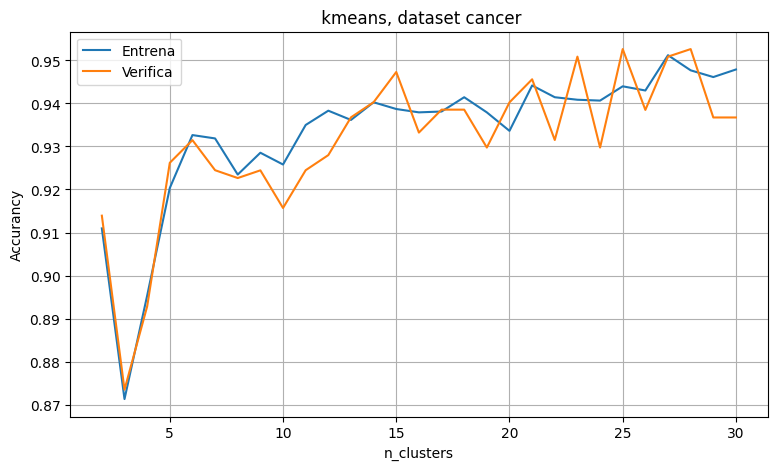

In [14]:
plt.figure(figsize=(9,5))
plt.plot(r_centros["No. Centros"], r_centros["Aciertos Entrena"],label="Entrena")#en x el numero centros y en y aciertos
plt.plot(r_centros["No. Centros"], r_centros["Aciertos Verifica"],label="Verifica")
plt.xlabel("n_clusters")
plt.ylabel("Accurancy")
plt.title(" kmeans, dataset cancer")
plt.grid()#muestro todo
plt.legend()
plt.show()

In [16]:
r_centros["Aciertos Entrena"]=pd.to_numeric(r_centros["Aciertos Entrena"])
print("maximo:",r_centros["Aciertos Entrena"].max())#cojo el mayor de la columna y su indice
print("indice:",r_centros["Aciertos Entrena"].idxmax())

r_centros["Aciertos Verifica"]=pd.to_numeric(r_centros["Aciertos Verifica"])
print("maximo:",r_centros["Aciertos Verifica"].max())
print("tamano capa oculta:",r_centros["Aciertos Verifica"].idxmax())

n_optimo=r_centros["Aciertos Verifica"].idxmax()#de la columna saca el idxmax

maximo: 0.951180250974659
indice: 25
maximo: 0.9526002506265664
tamano capa oculta: 23


<h1>Kmeans optimo</h1>

In [15]:
from sklearn.metrics.pairwise import euclidean_distances# de las metricas pairwise
from scipy.spatial.distance import cdist# de spatial distance

In [17]:

#mejor
#centros
#distancias
#sumo columnas
#cdist




kmedias=KMeans(n_clusters=n_optimo)#cojo el merjor
kmedias.fit(X)

centros=kmedias.cluster_centers_#cojo los centros
print("centros shape:")
print(centros.shape)

distancias = euclidean_distances(centros)
print("distancias:")
print(distancias)

#axis 0 suma de columnas. sumamos las columnas. ambos 0
sigma=np.sum(distancias,axis=0)/centros.shape[0]-1
print("sigma:")
print(sigma)


#cdist^2/(2*sigma^2)

X_svm=np.exp(   -cdist(X,kmedias.cluster_centers_)**2   /   (2*(sigma**2)))
print("X_svm:")
print(X_svm)

X_svm.shape

centros shape:
(23, 30)
distancias:
[[ 0.          5.38952821  3.33464531  6.93537759  3.95740298 12.31848292
   4.37315061 19.70074507 20.69941427  3.27034287  4.56405348  8.03846455
   2.74778791  9.04778419  4.46744785  4.75562247  8.65411704  4.00492931
   4.87883443  4.39985324  5.84923043 13.23717788  7.3358819 ]
 [ 5.38952821  0.          8.45280761  8.02753649  8.09191165 10.38425921
   3.73172962 15.44097496 21.48787289  7.97567543  9.08054954 11.16794873
   6.82835252 11.1918054   3.39667354  9.49282769  5.15619859  8.651962
   8.73995145  6.80978639 10.24405163 14.26236544  7.79721395]
 [ 3.33464531  8.45280761  0.          8.06350063  3.68411613 14.08506482
   6.72331486 21.87886019 20.74589887  2.41748457  2.35253139  6.69324362
   3.1403918   8.91759468  7.20367086  2.65199296 11.29556112  3.05158414
   3.78481333  5.30584028  3.26374707 13.57480844  8.56073752]
 [ 6.93537759  8.02753649  8.06350063  0.          6.64076308  9.32081666
   6.21531536 20.08064569 18.50688468

c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(569, 23)

<h1>svm y rbf</h1>

In [18]:
#hallar mejor grado
#para g del grado
    #para elementos de la validacion cruzada
        #aplico svm
        #entreno con train
        #guardo puntuacion con test
    #hago media
    #guardo aciertos




# para grado de la svc que aciertos tiene
# para cada grado hacer una validacion cruzada


aciertos_svm_grado=pd.DataFrame(columns=["Grado","Aciertos"])
for k,g in enumerate(range(2,10)):
    #en k va el indice: 0 a 7
    # en g va el valor: 2 a 9
    
  

    aciertos_svm=[]#lo pongo como array normal y despues lo convierto para hacer la media
    for train_index,test_index in skf.split(X_svm,y):
        
       

        svm=SVC(kernel="poly",degree=g,verbose=False)#algoritmo, con kernel poly y el degree del bucle
        svm.fit(X_svm[train_index],y[train_index])#entreno
        aciertos_svm.append(svm.score(X_svm[test_index],y[test_index]))#añado al array la puntuacion. acumulo la puntuacion de esa carpeta de la validacion cruzada
        #añado solo test

    aciertos=np.mean(np.array(aciertos_svm))#media del array don las 10 carpetas de la validacion cruzada
    

    print("grado",g,"\taciertos:",aciertos)
    aciertos_svm_grado.loc[k]=[g,aciertos]#inserto en el array


valor en k: 0
valor en g: 2
en train:
[ 25  26  27  28  29  30  31  32  33  34  35  36  38  39  40  41  42  43
  44  45  47  53  54  56  57  62  64  65  70  72  73  75  77  78  82  83
  85  86  87  91  94  95  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272
 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290
 291 292 293 

In [19]:
print(aciertos_svm_grado)

   Grado  Aciertos
0    2.0  0.964850
1    3.0  0.971836
2    4.0  0.966573
3    5.0  0.959555
4    6.0  0.957801
5    7.0  0.961247
6    8.0  0.961278
7    9.0  0.954261
